In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
#Creating the basick modell


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack =  nn.Sequential(
         nn.Linear(1,15),
         nn.ReLU(),
         nn.Linear(15,15),
         nn.ReLU(),
         nn.Linear(15,15),
         nn.ReLU(),
         nn.Linear(15,1),
         )
    def forward(self,x):
        logits = self.linear_stack(x)
        return logits



In [35]:
#create train_set
batch_size = 10000 #increasing batch size, helped for getting a more acruate result
X = torch.rand(batch_size,1, dtype=torch.float32)
Y = X**2

X_1 = torch.rand(90,1,dtype=torch.float32)
Y_1 = X_1**2


[Text(0.5, 1.0, 'low batch size')]

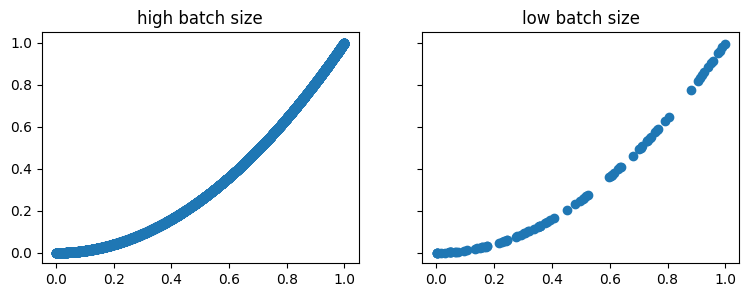

In [47]:
#Ploting the Data for better Visuals high batch size vs low batch size 
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(X, Y)
axs[0].set(title="high batch size")               
axs[1].scatter(X_1, Y_1)
axs[1].set(title="low batch size")

In [4]:
model = NeuralNetwork()

In [5]:
#Define Hyperparameters
lr = 0.01
optim = torch.optim.Adam(model.parameters(), lr=lr)

loss = torch.nn.MSELoss()
n_iters = 10000


In [6]:
# Training loop
for epochs in range(n_iters):
    #forward pass and loss
    out = model(X)
    l = loss(out,Y)
    #backward pass
    l.backward()
    #update weights
    optim.step()
    optim.zero_grad()

    #if epochs % 1000 == 0:
       # print(f" {epochs+100}, l={l.item()}")


In [7]:
test_cases = 10
for i in range(test_cases):
    X_test = torch.rand(1,1)
    print(f"Real outcome : {(X_test**2).item():.2f}; Predicted output : {model(X_test).item():.2f}")

Real outcome : 0.68; Predicted output : 0.68
Real outcome : 0.95; Predicted output : 0.95
Real outcome : 0.09; Predicted output : 0.09
Real outcome : 0.10; Predicted output : 0.09
Real outcome : 0.47; Predicted output : 0.47
Real outcome : 0.01; Predicted output : 0.01
Real outcome : 0.06; Predicted output : 0.06
Real outcome : 0.53; Predicted output : 0.52
Real outcome : 0.03; Predicted output : 0.03
Real outcome : 0.61; Predicted output : 0.61


In [8]:
#calculate accuracy
test_cases = 100
correct_count = 0
y = []
y_predicted = []
for i in range (test_cases):
    X_test = torch.rand(1,1, dtype=torch.float32)
    y.append(torch.round(X_test**2,decimals=2))
    y_predicted.append(torch.round(model(X_test), decimals=2))
    
count = 0   
for i in range(test_cases):
    if y_predicted[i] == y[i]:
        count += 1
#print(f"Accuracy of model : {(count/test_cases)*100} %")

In [9]:
#Lets see if adding additional layers improves overall accuracy of the model
class NeuralNetwork_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack =  nn.Sequential(
         nn.Linear(1,30),
         nn.ReLU(),
         nn.Linear(30,40),
         nn.ReLU(),
         nn.Linear(40,40),
         nn.ReLU(),
         nn.Linear(40,30),
         nn.ReLU(),
         nn.Linear(30,1),

         )
    def forward(self,x):
        logits = self.linear_stack(x)
        return logits

In [10]:
model_2 = NeuralNetwork_2()
lr = 0.01
optim = torch.optim.Adam(model_2.parameters(), lr=lr)

loss = torch.nn.MSELoss()
n_iters = 10000



In [11]:
for epochs in range(n_iters):
    #forward pass and loss
    out = model_2(X)
    l = loss(out,Y)
    #backward pass
    l.backward()
    #update weights
    optim.step()
    optim.zero_grad()
    n = 1000
    if epochs % n == 0:
        print(f" {epochs+n}, l={l.item()}")

 1000, l=0.17502480745315552
 2000, l=5.33618106146605e-07
 3000, l=8.922634719965572e-07
 4000, l=3.2597083077234856e-07
 5000, l=4.947588649883983e-07
 6000, l=3.573213916752138e-06
 7000, l=6.328834842861397e-07
 8000, l=5.198736516831559e-07
 9000, l=1.8911062227289221e-07
 10000, l=5.711793278351252e-07


In [12]:
def accuracy_model(model, range_test,test_cases):
    end_result = []
    for i in range(range_test):
        y = []
        y_predicted = []
        for i in range (test_cases):
            X_test = torch.rand(1,1, dtype=torch.float32)
            y.append(torch.round(X_test**2,decimals=2))
            y_predicted.append(torch.round(model(X_test), decimals=2))
    
        count = 0   
        for i in range(test_cases):
            if y_predicted[i] == y[i]:
                count += 1
        end_result.append((count/test_cases))
    return print(f"Average Accuracy of model over {range_test} iterations : {(sum(end_result)/range_test)*100:.2f} %")

In [13]:
accuracy_model(model,100,100) #lower number of hidden layers and neurons per Layer

Average Accuracy of model over 100 iterations : 85.47 %


In [14]:
accuracy_model(model_2,100,100)

Average Accuracy of model over 100 iterations : 96.83 %


In [15]:
# while reducing the batch_size we get better results with model_1 instead of model_2
# although we can see, that we are not getting much improvment while adding hidden layers

In [27]:
print(model_2(torch.Tensor([0.1])).item())
print(model_2(torch.Tensor([4])).item())

0.009483486413955688
5.679123878479004


4.0
